# Land Use Classification from Satellite Images

*Yi Yang and Shawn Newsam, "Bag-Of-Visual-Words and Spatial Extensions for Land-Use Classification," ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems (ACM GIS), 2010.*

*The data set is obtained from http://weegee.vision.ucmerced.edu/datasets/landuse.html*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Looking at the Data

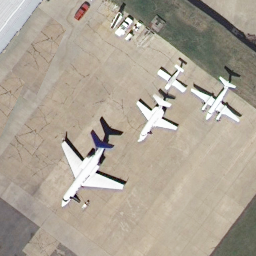

In [3]:
img = open_image('../data/Land_Use_Classification/UCMerced_LandUse/Images/airplane/airplane00.tif')
img

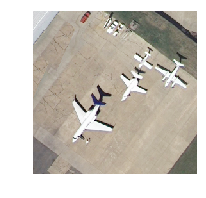

In [4]:
img.show()

In [5]:
img.data, img.shape, img.size

(tensor([[[0.8314, 0.8392, 0.8275,  ..., 0.7020, 0.7059, 0.6980],
          [0.8275, 0.8392, 0.8157,  ..., 0.6902, 0.6980, 0.6980],
          [0.8510, 0.8157, 0.8235,  ..., 0.6863, 0.7020, 0.7020],
          ...,
          [0.4471, 0.4510, 0.4588,  ..., 0.3725, 0.3843, 0.3843],
          [0.4510, 0.4510, 0.4275,  ..., 0.3647, 0.3804, 0.3804],
          [0.4471, 0.4471, 0.4392,  ..., 0.3725, 0.3725, 0.3804]],
 
         [[0.8392, 0.8431, 0.8314,  ..., 0.6706, 0.6745, 0.6667],
          [0.8314, 0.8431, 0.8157,  ..., 0.6549, 0.6667, 0.6667],
          [0.8471, 0.8157, 0.8275,  ..., 0.6510, 0.6706, 0.6706],
          ...,
          [0.4196, 0.4275, 0.4353,  ..., 0.3804, 0.3922, 0.3922],
          [0.4275, 0.4275, 0.4000,  ..., 0.3725, 0.3843, 0.3843],
          [0.4196, 0.4196, 0.4118,  ..., 0.3804, 0.3804, 0.3843]],
 
         [[0.8353, 0.8471, 0.8353,  ..., 0.6118, 0.6157, 0.6078],
          [0.8353, 0.8471, 0.8235,  ..., 0.5961, 0.6078, 0.6078],
          [0.8588, 0.8235, 0.8314,  ...,

In [6]:
path_img = Path('../data/Land_Use_Classification/UCMerced_LandUse/Images')

In [7]:
bs = 64

In [8]:
np.random.seed(10)
data = ImageDataBunch.from_folder(path_img, train ='.', valid_pct = 0.2, ds_tfms = get_transforms(), size = 256, bs = bs)
data.normalize(imagenet_stats)

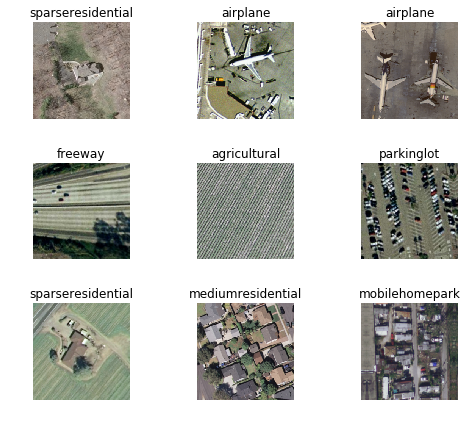

In [9]:
data.show_batch(rows = 3,figsize = (7,6))

In [10]:
data.classes, data.c

(['agricultural',
  'airplane',
  'baseballdiamond',
  'beach',
  'buildings',
  'chaparral',
  'denseresidential',
  'forest',
  'freeway',
  'golfcourse',
  'harbor',
  'intersection',
  'mediumresidential',
  'mobilehomepark',
  'models',
  'overpass',
  'parkinglot',
  'river',
  'runway',
  'sparseresidential',
  'storagetanks',
  'tenniscourt'],
 22)

## Training: resnet34

In [11]:
learn = create_cnn(data, arch = models.resnet34, metrics = error_rate)

In [12]:
learn.fit_one_cycle(16)

Total time: 04:34
epoch  train_loss  valid_loss  error_rate
1      2.867853    1.619594    0.429545    (00:23)
2      1.811637    0.657720    0.181818    (00:16)
3      1.164371    0.357248    0.097727    (00:16)
4      0.772523    0.253201    0.077273    (00:16)
5      0.527125    0.209071    0.063636    (00:16)
6      0.374304    0.185812    0.061364    (00:16)
7      0.267284    0.137725    0.054545    (00:16)
8      0.205015    0.147320    0.054545    (00:16)
9      0.150246    0.129801    0.040909    (00:16)
10     0.115696    0.108080    0.036364    (00:16)
11     0.090594    0.114902    0.034091    (00:16)
12     0.071837    0.098672    0.034091    (00:16)
13     0.061050    0.104954    0.045455    (00:16)
14     0.051019    0.099785    0.038636    (00:16)
15     0.044785    0.100212    0.038636    (00:16)
16     0.039980    0.100421    0.038636    (00:16)



In [13]:
labels = data.classes

In [14]:
labels

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'models',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

In [15]:
learn.save('stage-1')

## Results

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

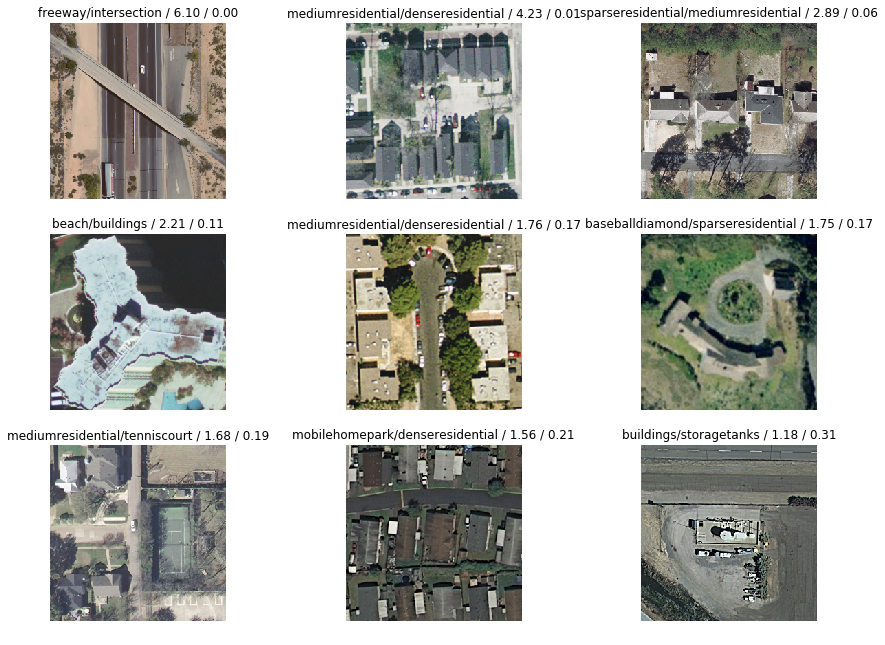

In [17]:
interp.plot_top_losses(9, figsize = (15,11))

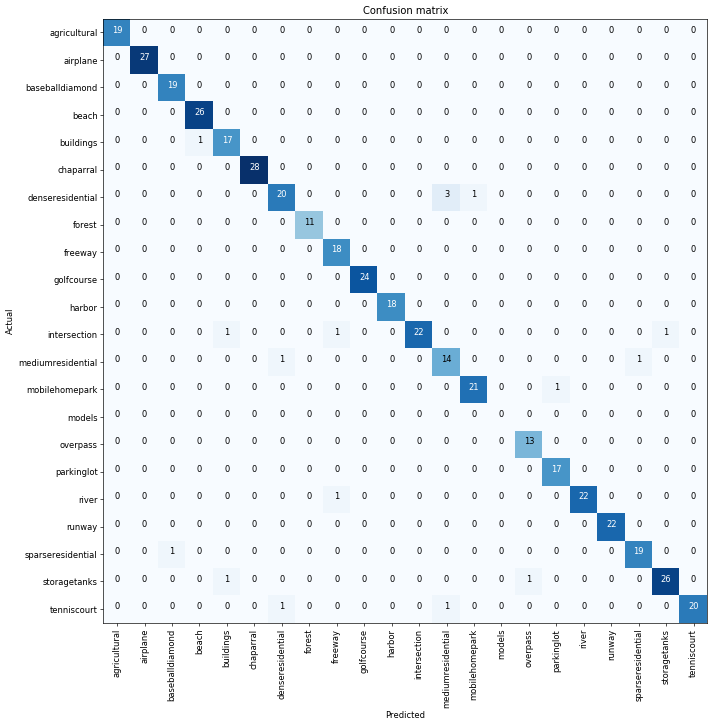

In [18]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [19]:
interp.most_confused(min_val = 2)

[('denseresidential', 'mediumresidential', 3)]

## Unfreezing, fine-tuning, and learning rates

In [20]:
learn.load('stage-1')

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(1)

Total time: 00:24
epoch  train_loss  valid_loss  error_rate
1      0.711966    2.737448    0.320455    (00:24)



In [23]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


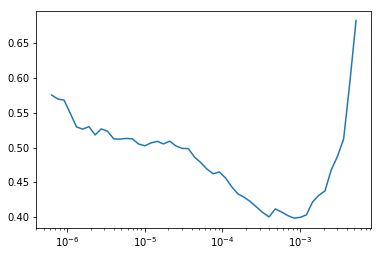

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(2, max_lr = slice(1e-4, 1e-3))

Total time: 00:44
epoch  train_loss  valid_loss  error_rate
1      0.353554    0.307026    0.084091    (00:22)
2      0.241792    0.144942    0.045455    (00:22)



In [26]:
learn.fit_one_cycle(2, max_lr = slice(1e-4, 1e-3))

Total time: 00:45
epoch  train_loss  valid_loss  error_rate
1      0.141098    0.208516    0.059091    (00:22)
2      0.136479    0.158330    0.045455    (00:22)



In [27]:
learn.fit_one_cycle(2, max_lr = slice(1e-4, 1e-3))

Total time: 00:45
epoch  train_loss  valid_loss  error_rate
1      0.097911    0.190269    0.059091    (00:22)
2      0.098131    0.136343    0.036364    (00:22)



In [28]:
learn.fit_one_cycle(1, max_lr = slice(1e-4, 1e-3))

Total time: 00:22
epoch  train_loss  valid_loss  error_rate
1      0.077559    0.133279    0.043182    (00:22)



In [29]:
learn.fit_one_cycle(2, max_lr = slice(1e-4, 1e-3))

Total time: 00:45
epoch  train_loss  valid_loss  error_rate
1      0.087666    0.255207    0.070455    (00:22)
2      0.102539    0.146691    0.038636    (00:22)



It appears fine-tuning did not help reduce the error rate much

## Training: resnet50

In [30]:
data = ImageDataBunch.from_folder(path_img, train = '.', valid_pct = 0.2, ds_tfms = get_transforms(), size = 299, bs = bs//2)
data.normalize(imagenet_stats)

In [31]:
learn = create_cnn(data, arch = models.resnet50, metrics = error_rate)

In [32]:
learn.fit_one_cycle(16)

Total time: 14:48
epoch  train_loss  valid_loss  error_rate
1      1.633898    0.534446    0.155702    (01:23)
2      0.791405    0.254515    0.063596    (00:53)
3      0.485415    0.209987    0.065789    (00:53)
4      0.289387    0.193173    0.052632    (00:53)
5      0.215652    0.169388    0.048246    (00:53)
6      0.164216    0.192268    0.063596    (00:53)
7      0.132850    0.157142    0.039474    (00:53)
8      0.100666    0.146318    0.048246    (00:53)
9      0.079748    0.131611    0.041667    (00:53)
10     0.083399    0.144999    0.041667    (00:53)
11     0.054597    0.107621    0.028509    (00:53)
12     0.039890    0.101032    0.032895    (00:53)
13     0.029324    0.106359    0.030702    (00:53)
14     0.030350    0.097226    0.030702    (00:53)
15     0.020902    0.099019    0.032895    (00:53)
16     0.018476    0.101299    0.032895    (00:53)



In [33]:
learn.save('stage-1-50')

Pretty much similar accuracy as that of resnet34. May be marginal improvement. Lets see if fine-tuning helps.

In [34]:
learn.load('stage-1-50')

In [35]:
learn.unfreeze()

In [36]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


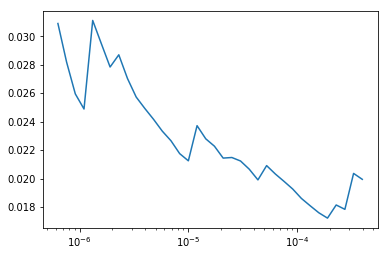

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(2, max_lr = slice(2e-6, 1e-5))

Total time: 02:24
epoch  train_loss  valid_loss  error_rate
1      0.018659    0.100232    0.035088    (01:14)
2      0.019410    0.097840    0.035088    (01:10)



In [39]:
learn.fit_one_cycle(2, max_lr = slice(2e-6, 1e-5))

Total time: 02:20
epoch  train_loss  valid_loss  error_rate
1      0.013000    0.097531    0.032895    (01:10)
2      0.011691    0.096478    0.030702    (01:10)



It appears fine-tuning did not help reduce the error rate much even in resnet50 model. There is marginal improvement though and may be this model can be used as a final model for inference.

In [40]:
learn.save('stage-2-50')

In [41]:
learn.load('stage-2-50')

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

In [43]:
interp.most_confused(min_val = 2)

[]

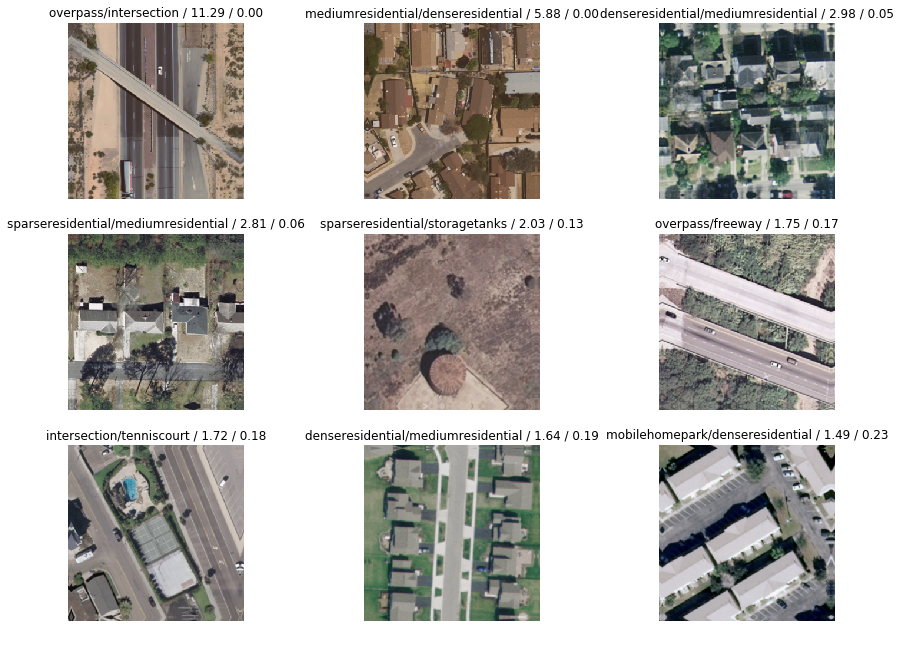

In [44]:
interp.plot_top_losses(9, figsize = (15,11))

This model is good enough when considering error rate.